In [1]:
from pathlib import Path

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from src.model.AlexNet import alexnet
from src.test_model import test_model
from src.train_model import train_model

%matplotlib inline

In [2]:
if torch.cuda.is_available():
    device = "cuda:0"
elif torch.backends.mps.is_built():
    device = torch.device("mps")
else:
    device = "cpu"

In [3]:
data_transforms = {
    "train": transforms.Compose([transforms.ToTensor()]),
    "val": transforms.Compose([transforms.ToTensor()]),
    "test": transforms.Compose([transforms.ToTensor()]),
}

data_dir = Path("../tiny-imagenet-200/")
num_workers = {"train": 2, "val": 0, "test": 0}
image_datasets = {
    x: datasets.ImageFolder(data_dir / x, data_transforms[x]) for x in ["train", "val", "test"]
}
dataloaders = {
    x: torch.utils.data.DataLoader(image_datasets[x], batch_size=500, shuffle=True, num_workers=num_workers[x])
    for x in ["train", "val", "test"]
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val", "test"]}

In [4]:
# Load AlexNet
torch.manual_seed(42)
model_ft = alexnet().to(device)

# Loss Function
criterion = nn.CrossEntropyLoss().to(device)
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

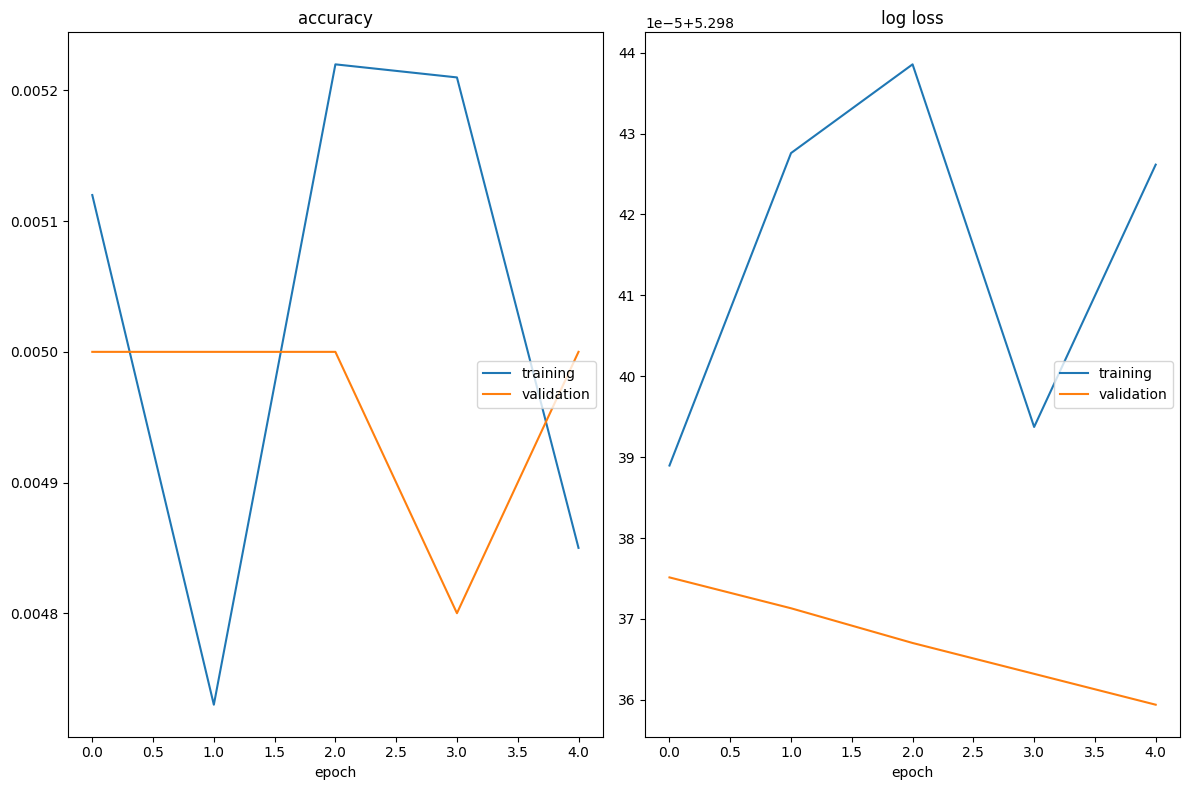

accuracy
	training         	 (min:    0.005, max:    0.005, cur:    0.005)
	validation       	 (min:    0.005, max:    0.005, cur:    0.005)
log loss
	training         	 (min:    5.298, max:    5.298, cur:    5.298)
	validation       	 (min:    5.298, max:    5.298, cur:    5.298)
Training complete in 1m 60s
Best Validation Accuracy: 0.004999999888241291, Epoch: 1


1

In [5]:
# Train
train_model(
    output_path="Alex_not_pretrained",
    model=model_ft,
    dataloaders=dataloaders,
    criterion=criterion,
    optimizer=optimizer_ft,
    device=device,
    num_epochs=5,
)

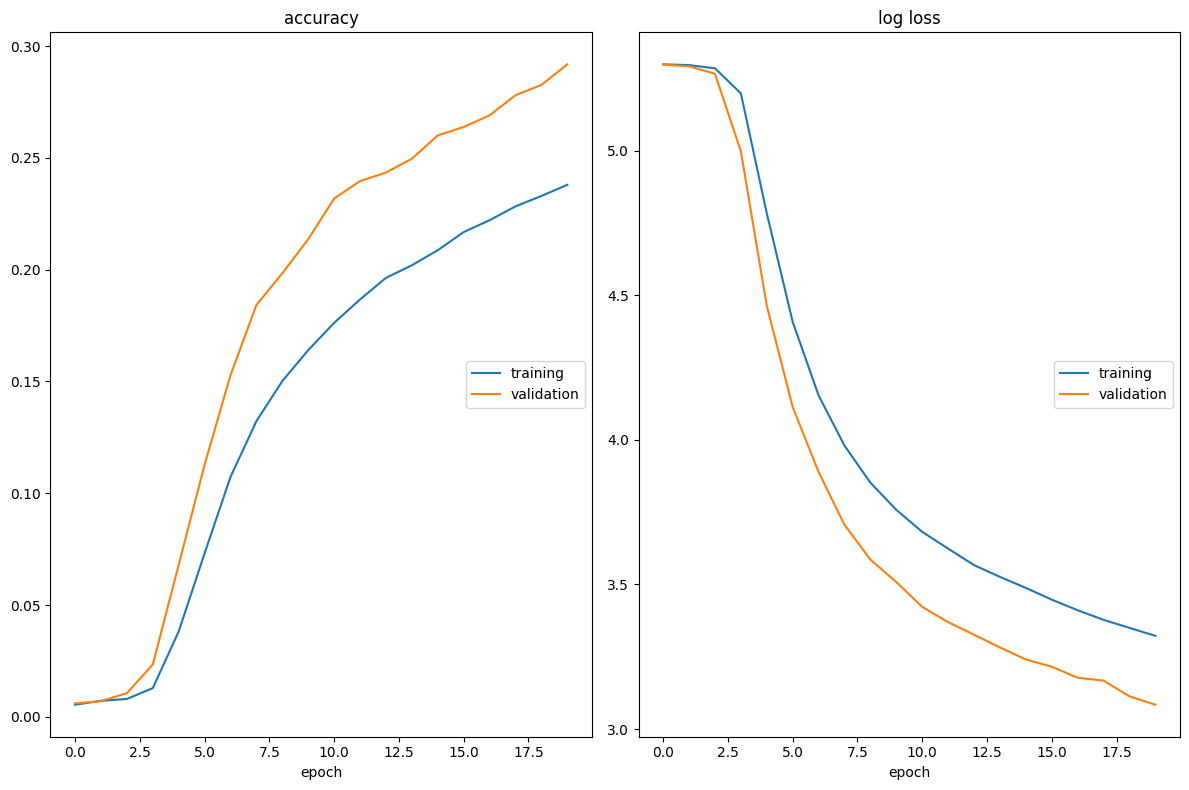

accuracy
	training         	 (min:    0.005, max:    0.238, cur:    0.238)
	validation       	 (min:    0.006, max:    0.292, cur:    0.292)
log loss
	training         	 (min:    3.322, max:    5.298, cur:    3.322)
	validation       	 (min:    3.084, max:    5.297, cur:    3.084)
Training complete in 7m 59s
Best Validation Accuracy: 0.29179999232292175, Epoch: 20


In [6]:
# Load AlexNet with pretrained weights
model_ft = alexnet(pretrained=True).to(device)

# Loss Function
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Train
best_epoch = train_model(
    output_path="Alex_pretrained",
    model=model_ft,
    dataloaders=dataloaders,
    criterion=criterion,
    optimizer=optimizer_ft,
    device=device,
    num_epochs=20,
)

In [7]:
# Test
model_ft.load_state_dict(torch.load(f"models/Alex_pretrained/model_{best_epoch}_epoch.pt"))
test_model(model=model_ft, dataloaders=dataloaders, criterion=criterion, device=device)

Test Loss: 3.1334 Acc: 0.2780
Test complete in 0m 1s
